# Assignment 3 - Xinan Wang

## Question 1

### 1. Create a custom linear regression model using the house pricing dataset(houseprices.csv  Download houseprices.csv) (20 points)

 a) Split the dataset into training and test dataset 80:20

 b) Custom linear regression model should be in python class format (Should have init(), predict(), train() methods) and train the model using training dataset

 c) Predict the house prices using test dataset

 d) Show the predicted output, and loss function output plots

 e) Calculate the RMSE and R2 metrics

Note: Do not use any libraries

In [328]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [382]:
dfdata = pd.read_csv("houseprices.csv")
dfdata

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East
...,...,...,...,...,...,...,...,...
123,124,119700,1900,3,3,3,Yes,East
124,125,147900,2160,4,3,3,Yes,East
125,126,113500,2070,2,2,2,No,North
126,127,149900,2020,3,3,1,No,West


For this dataset, we want to use SqFt, Bedrooms....and so many features to predict the houses' price

(a) Split the dataset into training and test dataset 80:20

We need to define the X(features) and Y(labels)

In [401]:
# Define features and labels
Y = dfdata.iloc[:,1].values
X = dfdata.iloc[:,2:].values

By looking at the dataset, we found that Brick variable and the Neighborhood variables are both categorical variables. So, we need to convert the text data to the numbers first

In [403]:
# Convert text data to numbers
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [4,5])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

We need to scale the dataset to let the numbers close to each other

In [404]:
# Scale the dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

We now need to split the dataset into training dataset and testing dataset at 80:20

In [405]:
# Split the dataset into training and testing
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split( X, Y, test_size = 0.2,random_state=42)

(b) Custom linear regression model should be in python class format (Should have init(), predict(), train() methods) and train the model using training dataset

In [406]:
class LinearRegression():
    def __init__(self, b = 0, alpha = 0.002, iterations = 10000):
        """Initialize Linear regression model.

        Parameters
        ----------
        param1: b
        param2: alpha
        param3: iterations
        """
        self.b = b
        self.alpha = alpha
        self.iterations = iterations

    def train(self, x, y):
        """Train the dataset by using x data(features) and y data(label)

        Parameters
        ----------
        param1: x
        param2: y
        """
        cost_list = [0] * self.iterations
        
        w = np.zeros(x.shape[1])
        b = self.b
        alpha = self.alpha
   
        for iteration in range(self.iterations):
            z = x.dot(w) + b
            loss = z - y
        
            weight_gradient = x.T.dot(loss) / len(y)
            bias_gradient = np.sum(loss) / len(y)
        
            w = w - alpha*weight_gradient
            b = b - alpha*bias_gradient
  
            cost = np.sum((((x.dot(w) + b) - y) ** 2) / (2*len(y)))
            cost_list[iteration] = cost
        
            if (iteration%(self.iterations/10)==0):
                print("Cost at epoch",iteration,"is:",cost)
        
        return w, b, cost_list

    def predict(self,Xdata,w,b):
        """Predict the input dataset value

        Parameters
        ----------
        param1: Xdata
        param2: w
        param3: b
        """
        predictions = Xdata.dot(w) + b
        return predictions

Now, we need to import data into the linear regression model and train the model using the training dataset

In [407]:
# Train the model using the train dataset
linear_regression = LinearRegression()
w,b,cost_list = linear_regression.train(Xtrain,Ytrain)

Cost at epoch 0 is: 8883416892.602966
Cost at epoch 1000 is: 213012206.4665215
Cost at epoch 2000 is: 50115891.39089476
Cost at epoch 3000 is: 45562176.08161147
Cost at epoch 4000 is: 45266560.57099985
Cost at epoch 5000 is: 45227340.91289041
Cost at epoch 6000 is: 45220529.31173113
Cost at epoch 7000 is: 45219158.72561496
Cost at epoch 8000 is: 45218847.238012865
Cost at epoch 9000 is: 45218769.4310251


c) Predict the house prices using test dataset

We use the predict method in the linear regression class to predict the Y value of the Xtest dataset, and we want to use Ytest to find our model performance

In [408]:
# Using test dataset to predict the house prices
YPredict = linear_regression.predict(Xtest,w,b)
YPredict

array([116006.1012073 ,  98261.13011192, 160645.26977742, 129954.10409523,
       153767.85021432, 139090.31802715, 148518.85914532,  97115.1288374 ,
       177414.93268991, 136795.21092688, 169461.36043892, 101726.67346404,
       133329.66757477, 125709.92815581, 144139.59111034, 129258.11065115,
       110200.61331483, 137509.84668521, 121496.21319019,  80250.34656971,
       123365.1682017 , 129578.23392158, 126285.58436816, 124923.68005627,
       166723.51818463,  99718.15377902])

Here, we used our linear regression model to find the predicted Y values by using our X test dataset features.

d) Show the predicted output, and loss function output plots

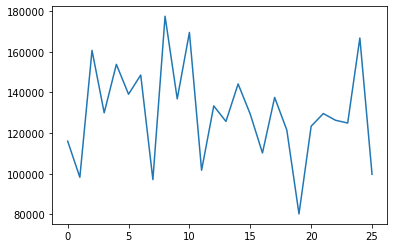

In [409]:
# Predicted output
plt.plot(YPredict)

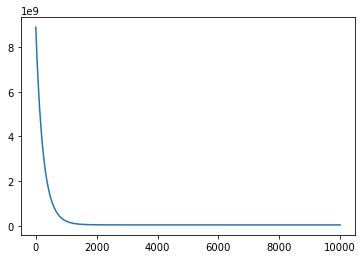

In [410]:
# Loss function output
plt.plot(cost_list)

From the loss function output, we can find that the cost function was initially to be very large at the beginning of our model. However, it decreases very fast and then finally converge to y = 0 line.

e) Calculate the RMSE and R2 metrics

RMSE

In [411]:
from math import sqrt
def RMSE(YPredict, YTest):
    return sqrt(np.sum((YTest - YPredict)**2)/YTest.shape[0])

In [412]:
RMSE(YPredict,Ytest)

10683.698008960784

R2 metrics

In [413]:
def r2score(y_pred, y):
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)
    
    r2 = 1 - (rss / tss)
    return r2

In [414]:
# r2score for YPredict and the real Y
r2score(YPredict,Ytest)

0.806342690866721

By using the R2 metrics, we find that the model has around 70.91% accuracy to the Xtest dataset, which is a pretty good performance.

## Question 2

### 2. Perform model selection using subset best, forward selection, and backward selection methods (15 points)

a) Show your best model features

c) Compare your model performance against the model Q1

In [190]:
%matplotlib inline
import pandas as pd
import numpy as np
import itertools
import time
import statsmodels.api as sm
import matplotlib.pyplot as plt

(a)Show your best model features

Subset Best

In [388]:
dfdata = pd.read_csv("houseprices.csv")
dfdata

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East
...,...,...,...,...,...,...,...,...
123,124,119700,1900,3,3,3,Yes,East
124,125,147900,2160,4,3,3,Yes,East
125,126,113500,2070,2,2,2,No,North
126,127,149900,2020,3,3,1,No,West


We need to check the null value

In [368]:
# Check null values for price features
print("Number of null values:", dfdata["Price"].isnull().sum())

Number of null values: 0


there's no null value, so we're good. Now we want to find X of the dataset

In [390]:
# get dummies
dummies = pd.get_dummies(dfdata[['Brick','Neighborhood']])

y = dfdata.Price

# Drop the column with the independent variable (Price), and columns for which we created dummy variables
X_ = dfdata.drop(['Brick', 'Neighborhood','Price'], axis=1).astype('float64')

# Define the feature set X.
X = pd.concat([X_, dummies[['Brick_Yes','Neighborhood_East','Neighborhood_North','Neighborhood_West']]], axis=1)

Now, we want to perform best subset selection by identifying the best model that contains a given number of predictors, where best is quantified using RSS. And we now need to define a helper function to output the best set of variables for each model size:

In [392]:
def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y,X[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X[list(feature_set)]) - y) ** 2).sum()
    return {"model":regr, "RSS":RSS}

In [393]:
def getBest(k):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

We now want to call the function for each number of predictors k

In [201]:
models_best = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
for i in range(1,8):
    models_best.loc[i] = getBest(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed 9 models on 1 predictors in 0.06513786315917969 seconds.
Processed 36 models on 2 predictors in 0.05798506736755371 seconds.
Processed 84 models on 3 predictors in 0.0937347412109375 seconds.
Processed 126 models on 4 predictors in 0.16265010833740234 seconds.
Processed 126 models on 5 predictors in 0.16270208358764648 seconds.
Processed 84 models on 6 predictors in 0.128662109375 seconds.
Processed 36 models on 7 predictors in 0.04920196533203125 seconds.
Total elapsed time: 0.7342782020568848 seconds.


Now we have one big `DataFrame` that contains the best models we've generated along with their RSS:

In [202]:
models_best

,RSS,model
1,6.379185e+10,<statsmodels.regression.linear_model.Regressio...
2,3.171029e+10,<statsmodels.regression.linear_model.Regressio...
3,2.024858e+10,<statsmodels.regression.linear_model.Regressio...
4,1.451306e+10,<statsmodels.regression.linear_model.Regressio...
5,1.278322e+10,<statsmodels.regression.linear_model.Regressio...
6,1.210035e+10,<statsmodels.regression.linear_model.Regressio...
7,1.204590e+10,<statsmodels.regression.linear_model.Regressio...


Access the detail of each model

In [203]:
print(models_best.loc[2, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              4445.
Date:                Tue, 27 Sep 2022   Prob (F-statistic):                   1.43e-117
Time:                        18:14:26   Log-Likelihood:                         -1418.6
No. Observations:                 128   AIC:                                      2841.
Df Residuals:                     126   BIC:                                      2847.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

Show the best 9-variable model

In [205]:
# Show the best 9-variable model (there's actually only one)
print(getBest(9)["model"].summary())

Processed 1 models on 9 predictors in 0.07672405242919922 seconds.
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     98.54
Date:                Tue, 27 Sep 2022   Prob (F-statistic):           8.25e-49
Time:                        18:15:02   Log-Likelihood:                -1356.6
No. Observations:                 128   AIC:                             2731.
Df Residuals:                     119   BIC:                             2757.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

Find the best rsquare value:

In [206]:
models_best.loc[2, "model"].rsquared

0.9860253557388876

Gets the second element from each row ('model') and pulls out its rsquared attribute

In [207]:
# Gets the second element from each row ('model') and pulls out its rsquared attribute
models_best.apply(lambda row: row[1].rsquared, axis=1)

1    0.971887
2    0.986025
3    0.991077
4    0.993604
5    0.994366
6    0.994667
7    0.994691
dtype: float64

As expected, the $R^2$ statistic increases monotonically as more
variables are included.

Plotting RSS, adjusted $R^2$, AIC, and BIC for all of the models at once will
help us decide which model to select. Note the `type="l"` option tells `R` to
connect the plotted points with lines:
As expected, the $R^2$ statistic increases monotonically as more
variables are included.

Plotting RSS, adjusted $R^2$, AIC, and BIC for all of the models at once will
help us decide which model to select. Note the `type="l"` option tells `R` to
connect the plotted points with lines:

Text(0, 0.5, 'BIC')

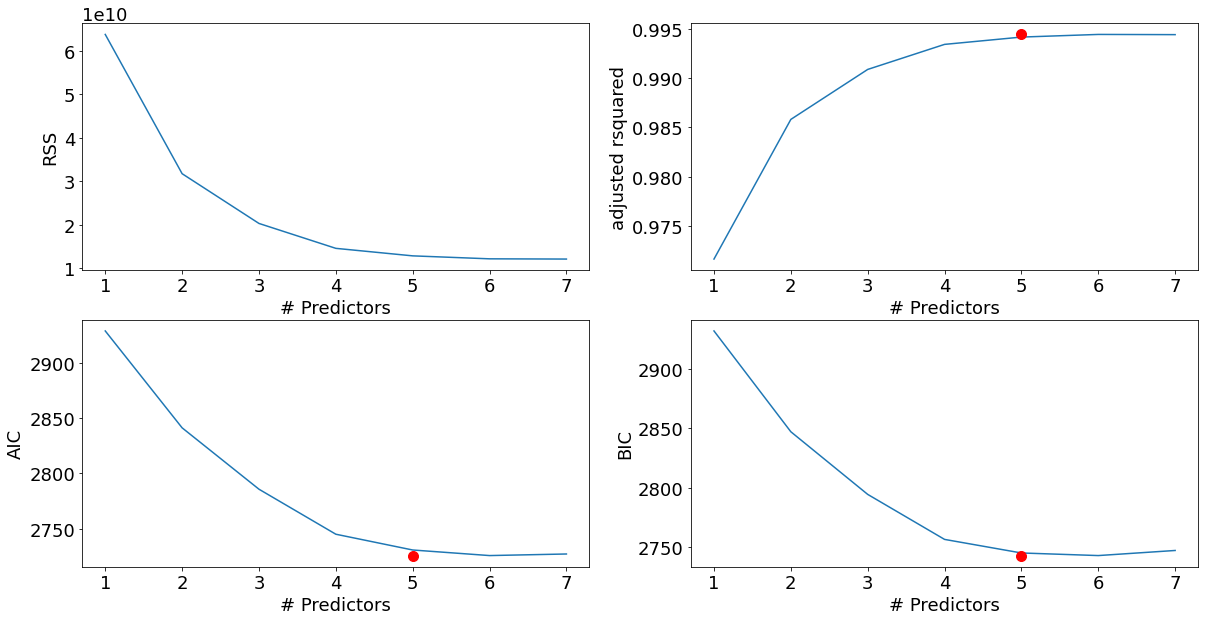

In [208]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

# Set up a 2x2 grid so we can look at 4 plots at once
plt.subplot(2, 2, 1)

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector
plt.plot(models_best["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector

rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)

plt.subplot(2, 2, 2)
plt.plot(rsquared_adj)
plt.plot(rsquared_adj.argmax(), rsquared_adj.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
aic = models_best.apply(lambda row: row[1].aic, axis=1)

plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

bic = models_best.apply(lambda row: row[1].bic, axis=1)

plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('BIC')

According to the adjsuted rsquared, AIC and BIC models, we can find that the model has  around 5 predictors may has the best performance. They all agree that the predictors less than 5 or fewer predictors is insufficient.

Forward Selection

We can also use a similar approach to perform forward stepwise
or backward stepwise selection, using a slight modification of the functions we defined above:

In [209]:
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

Find the time cost it runs:

In [210]:
models_fwd = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
predictors = []

for i in range(1,len(X.columns)+1):    
    models_fwd.loc[i] = forward(predictors)
    predictors = models_fwd.loc[i]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  9 models on 1 predictors in 0.06007099151611328 seconds.
Processed  8 models on 2 predictors in 0.037322044372558594 seconds.
Processed  7 models on 3 predictors in 0.024404287338256836 seconds.
Processed  6 models on 4 predictors in 0.019958019256591797 seconds.
Processed  5 models on 5 predictors in 0.011090755462646484 seconds.
Processed  4 models on 6 predictors in 0.010766029357910156 seconds.
Processed  3 models on 7 predictors in 0.012660026550292969 seconds.
Processed  2 models on 8 predictors in 0.008875131607055664 seconds.
Processed  1 models on 9 predictors in 0.003977060317993164 seconds.
Total elapsed time: 0.21837902069091797 seconds.


Show the summary:

In [211]:
print(models_fwd.loc[1, "model"].summary())
print(models_fwd.loc[2, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              4390.
Date:                Tue, 27 Sep 2022   Prob (F-statistic):                   2.30e-100
Time:                        18:29:44   Log-Likelihood:                         -1463.3
No. Observations:                 128   AIC:                                      2929.
Df Residuals:                     127   BIC:                                      2932.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

The best predictor for this price-prediction model is SqFt, and the best 2 are SqFt and Neighborhood_West.

In [394]:
print(models_best.loc[5, "model"].summary())
print(models_fwd.loc[5, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              4342.
Date:                Tue, 27 Sep 2022   Prob (F-statistic):                   1.75e-136
Time:                        23:16:50   Log-Likelihood:                         -1360.5
No. Observations:                 128   AIC:                                      2731.
Df Residuals:                     123   BIC:                                      2745.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

According to the summary table, we can find that the best one-variable through five-variable models are each identical for best subset and forward selection.
And the top 5 best predictors are SqFt, Neighborhood_West, Brick_Yes, Offers, Bathrooms

Backward Selection

Looping through the predictors in reverse:

In [213]:
def backward(predictors):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)-1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [214]:
models_bwd = pd.DataFrame(columns=["RSS", "model"], index = range(1,len(X.columns)))

tic = time.time()
predictors = X.columns

while(len(predictors) > 1):  
    models_bwd.loc[len(predictors)-1] = backward(predictors)
    predictors = models_bwd.loc[len(predictors)-1]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  9 models on 8 predictors in 0.04503226280212402 seconds.
Processed  8 models on 7 predictors in 0.023672103881835938 seconds.
Processed  7 models on 6 predictors in 0.017671823501586914 seconds.
Processed  6 models on 5 predictors in 0.01588916778564453 seconds.
Processed  5 models on 4 predictors in 0.00984501838684082 seconds.
Processed  4 models on 3 predictors in 0.008574962615966797 seconds.
Processed  3 models on 2 predictors in 0.006140232086181641 seconds.
Processed  2 models on 1 predictors in 0.002895832061767578 seconds.
Total elapsed time: 0.1349329948425293 seconds.


In [395]:
print("------------")
print("Best Subset:")
print("------------")
print(models_best.loc[5, "model"].params)

------------
Best Subset:
------------
SqFt                    58.063161
Bathrooms             8670.584514
Offers               -7733.979226
Brick_Yes            16867.624729
Neighborhood_West    24301.795812
dtype: float64


In [397]:
print("-----------------")
print("Forward Selection:")
print("-----------------")
print(models_fwd.loc[5, "model"].params)

-----------------
Forward Selection:
-----------------
SqFt                    58.063161
Neighborhood_West    24301.795812
Brick_Yes            16867.624729
Offers               -7733.979226
Bathrooms             8670.584514
dtype: float64


In [398]:
print("-------------------")
print("Backward Selection:")
print("-------------------")
print(models_bwd.loc[5, "model"].params)

-------------------
Backward Selection:
-------------------
SqFt                    58.063161
Bathrooms             8670.584514
Offers               -7733.979226
Brick_Yes            16867.624729
Neighborhood_West    24301.795812
dtype: float64


From the output, we can find that the best predictors number is 5 for this price predict model. And the top 5 predictors are SqFt, Bathrooms, Offers, Brick, Neighborhood_West according to all the methods.

c)Compare your model performance against the model Q1

From the previous output from a) in this question, we found that the best predictors' r2score could be reach to 0.994366, however, my r2score is only 0.806342690866721, which is greatly smaller than the accuracy that we predict to be. This maybe because that we didn't drop any predictors in this question. If we would like to subset the predictors, I will try to use SqFt, Neighborhood_West, Brick_Yes, Offers, Bathrooms as my predictors because they are much more accurate than the other predictors based on the analysis.

## Extra Credit
a) Implement Ridge/Lasso regression for the dataset

b) Compare the lasso/ridge regression model output with Q1, and Q3 models performance metrics

Note: RMSE and R2 performance metrics are sufficient for comparison

 

a) Implement Ridge/Lasso regression for the dataset

In [275]:
dfdata = pd.read_csv('houseprices.csv')
dfdata

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East
...,...,...,...,...,...,...,...,...
123,124,119700,1900,3,3,3,Yes,East
124,125,147900,2160,4,3,3,Yes,East
125,126,113500,2070,2,2,2,No,North
126,127,149900,2020,3,3,1,No,West


In [276]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [277]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split( X, Y, test_size = 0.2,random_state=42)

In [313]:
def cost_function_Ridge(x, y, lamda, theta):
    np.sum(((np.dot(x,theta) - y) ** 2) / (2*x.shape[0]) + (lamda * np.sum(theta**2)))

def Ridge_gradient_descent(x, y, alpha, iterations, lamda, theta, b):
        n = x.shape[1]
        cost_list = [0] * iterations
        
        for i in range(10000):
            z = x.dot(theta) + b
            loss = z - y
        
            weight_gradient = x.T.dot(loss) / len(y)
            bias_gradient = np.sum(loss) / len(y)
        
            theta = theta - alpha*weight_gradient
            
            cost = np.sum(np.power(x.dot(theta) + b - y,2) / (2*x.shape[0]) + (lamda * np.sum(theta**2)))
            cost_list[i] = cost
        
            if (i%(iterations/10)==0):
                print("Cost at epoch",i,"is:",cost)
        return cost_list, theta, b

In [314]:
theta = np.zeros(Xtrain.shape[1])
lamda = 0.2
alpha = 0.02
b = 0
iterations = 10000
cost_list, theta, b = Ridge_gradient_descent(Xtrain,Ytrain,alpha,iterations,lamda,theta,b)

Cost at epoch 0 is: 8899289704.114614
Cost at epoch 1000 is: 30844660944.06137
Cost at epoch 2000 is: 30887570610.314804
Cost at epoch 3000 is: 30887652273.1402
Cost at epoch 4000 is: 30887652428.888847
Cost at epoch 5000 is: 30887652429.185936
Cost at epoch 6000 is: 30887652429.186127
Cost at epoch 7000 is: 30887652429.186127
Cost at epoch 8000 is: 30887652429.186127
Cost at epoch 9000 is: 30887652429.186127


In [316]:
def predict(x, theta, b):
    return x.dot(theta) + b

In [318]:
YPredict = predict(Xtest, theta, b)

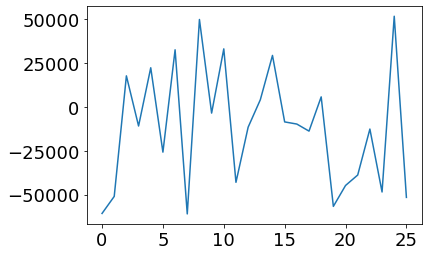

In [319]:
plt.plot(YPredict)

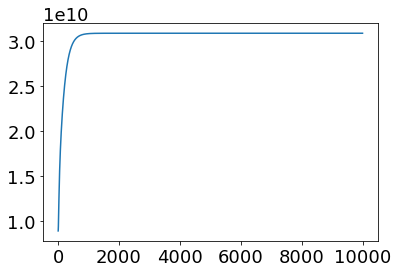

In [320]:
plt.plot(cost_list)

In [321]:
def r2score(y_pred, y):
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)
    
    r2 = 1 - (rss / tss)
    return r2

In [322]:
r2score(YPredict, Ytest)

-33.550943903708045